### AUTOR: Lucas Amaral

### Classificação de textos para análise de sentimentos

Base de dados 

Instruções:
- O objetivo deste trabalho é criar um modelo binário de aprendizado de máquina para classificação de textos. 
Para isso, será utilizado a base de dados [IMDb](http://ai.stanford.edu/~amaas/data/sentiment/), que consiste de dados textuais de críticas positivas e negativas de filmes
- Uma vez treinado, o modelo deve ter uma função `predict` que recebe uma string como parâmetro e retorna o valor 1 ou 0, aonde 1 significa uma crítica positiva e 0 uma crítica negativa
- O pré-processamento pode ser desenvolvidado conforme desejar (ex.: remoção de stopwords, word embedding, one-hot encoding, char encoding)
- É preferível que seja empregado um modelo de recorrência (ex.: rnn, lstm, gru) para a etapa de classificação
- Documente o código (explique sucintamente o que cada função faz, insira comentários em trechos de código relevantes)
- **Atenção**: Uma vez treinado o modelo final, salve-o no diretório do seu projeto e crie uma célula ao final do notebook contendo uma função de leitura deste arquivo, juntamente com a execução da função `predict`

Sugestões:
- Explorar a base de dados nas células iniciais do notebook para ter um melhor entendimento do problema, distribuição dos dados, etc
- Após desenvolver a estrutura de classificação, é indicado fazer uma busca de hiperparâmetros e comparar os resultados obtidos em diferentes situações

Prazo de entrega:
- 01-08-2021 às 23:59hs GMT-3

Formato preferível de entrega:
- Postar no portal Ava da disciplina o link do projeto no github (ou anexar o projeto diretamente no portal Ava)

luann.porfirio@gmail.com

In [9]:
!pip install torchtext

In [10]:
from torchtext import datasets

# Buscando dataset IMDB
train_iter, test_iter = datasets.IMDB()
train_sentiments, train_reviews = zip(*train_iter)
test_sentiments, test_reviews = zip(*test_iter)

In [11]:
import pandas as pd

# Criando DataFrames pra facilitar as análises

df_train = pd.DataFrame(columns = ['sentiment', 'review'])
df_train.sentiment = train_sentiments
df_train.review = train_reviews

df_test = pd.DataFrame(columns = ['sentiment', 'review'])
df_test.sentiment = test_sentiments
df_test.review = test_reviews

In [12]:
# Exemplo de reviews

df_train.head()

,sentiment,review
0,neg,I rented I AM CURIOUS-YELLOW from my video sto...
1,neg,"""I Am Curious: Yellow"" is a risible and preten..."
2,neg,If only to avoid making this type of film in t...
3,neg,This film was probably inspired by Godard's Ma...
4,neg,"Oh, brother...after hearing about this ridicul..."


In [13]:
# Verificando quantidade de sentimentos positivos e negativos
print(df_train.sentiment.value_counts())
print(df_test.sentiment.value_counts())

pos    12500
neg    12500
Name: sentiment, dtype: int64
pos    12500
neg    12500
Name: sentiment, dtype: int64


In [14]:
import nltk
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Definindo tokenizer e stopwords
tokenizer = ToktokTokenizer()
stopword_list = stopwords.words('english')
print(stopword_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [15]:
from bs4 import BeautifulSoup
import re,string,unicodedata

# Funções para limpeza das reviews

def encode_sentiment (df):
  return df['sentiment'].apply(lambda x : 1 if x == 'pos' else 0)

def reviews_cleaning (df):
  return df['review'].apply(lambda x : review_cleaning(x))

def review_cleaning (review):
  review = clear_text(review)
  review = remove_stopwords_review(review)
  return review

def clear_text(review):
  text = review
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()                   # Remover tags HTML
  text = re.sub('\[[^]]*\]', '', text)     # Remover []
  text = re.sub(r'[^a-zA-z0-9\s]','',text) # Remover caracteres especiais
  text = str(text).lower()                 # Lowercase
  return text

def remove_stopwords_review(review):
  text = review
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)    
  return filtered_text

def format_df(df):
  df['sentiment'] = encode_sentiment(df)
  df['review'] = reviews_cleaning(df)
  return df

In [16]:
from sklearn.model_selection import train_test_split

# Limpeza das reviews de treino e teste

df_test = format_df(df_test)
df_train = format_df(df_train)
# Separação das reviews de treino em treino e validação
df_train, df_valid = train_test_split(df_train, test_size=0.1) 
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

In [17]:
print("Qtd reviews de treino :", len(df_train))
print("Qtd reviews de validação :",len(df_valid))
print("Qtd reviews de teste :", len(df_test))

Qtd reviews de treino : 22500
Qtd reviews de validação : 2500
Qtd reviews de teste : 25000


In [18]:
df_train.head()

,sentiment,review
0,1,good drama young girl attempts unravel series ...
1,1,really loved version emma best kate beckinsale...
2,0,starts bad three women acting like simpering j...
3,0,tedious girlsatreformschool flick plays somewh...
4,0,god incredible movie reminded much similar sce...


In [19]:
df_valid.head()

,sentiment,review
0,0,understand people might wish stress films link...
1,0,see director trying missed mark main actor rea...
2,0,based personal experiences director john singl...
3,1,flipping around tv hbo showing double whammy u...
4,1,actually good thing sean connery retired james...


In [20]:
df_test.head()

,sentiment,review
0,0,love scifi willing put lot scifi moviestv usua...
1,0,worth entertainment value rental especially li...
2,0,totally average film semialright action sequen...
3,0,star rating saturday night friday night friday...
4,0,first let say havent enjoyed van damme movie s...


In [21]:
from collections import Counter

# Gerando uma lista com todas as reviews
reviews = df_train.review.append(df_valid.review).append(df_test.review)

# Criando uma lista de palavras utilizadas nas reviews
words_list = ' '.join(reviews).split()

# Criando mapeamento das palavras, palavra => indice
counts = Counter(words_list)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab,1)} 

In [22]:
# Quantidade de palavras mapeadas
print('Palavras mapeadas: ', len((vocab_to_int)))

Palavras mapeadas:  221639


In [23]:
# Testando o mapa
test_review = "really nice movie"
print([vocab_to_int[word] for word in test_review.split()])

[9, 219, 1]


In [50]:
# Gráfico wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

Negative Wordcloud com os dados de treinamento


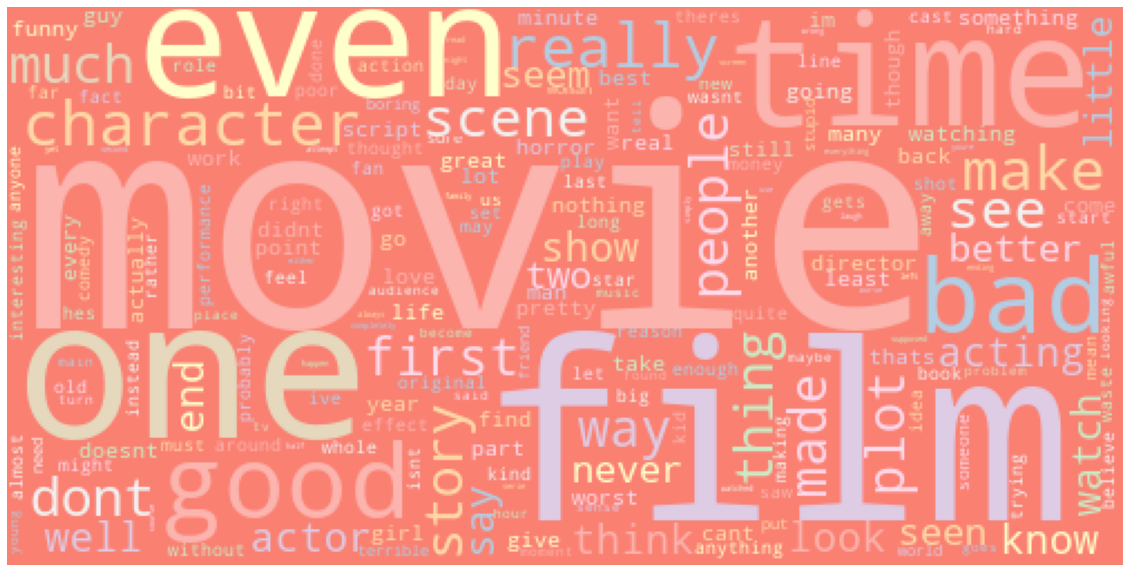

In [56]:
print("Negative Wordcloud com os dados de treinamento")
negative_reviews = df_train[df_train.sentiment == 0]
negative_reviews = negative_reviews.review
wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(negative_reviews))
plot_cloud(wordcloud)

Positive Wordcloud com os dados de treinamento


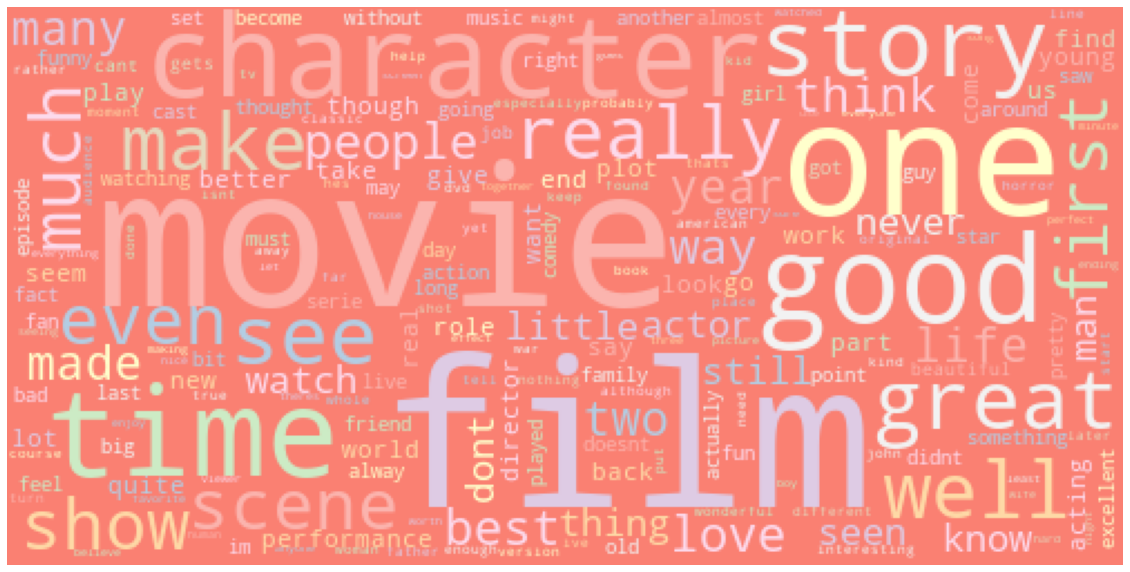

In [58]:
print("Positive Wordcloud com os dados de treinamento")
positive_reviews = df_train[df_train.sentiment == 1]
positive_reviews = positive_reviews.review
wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(positive_reviews))
plot_cloud(wordcloud)

In [24]:
# Utilizando o mapa de palavra => indice para converter as reviews em lista de inteiros

train_x = []
for review in df_train.review:
    train_x.append([vocab_to_int[word] for word in review.split()])

test_x = []
for review in df_test.review:
    test_x.append([vocab_to_int[word] for word in review.split()])

valid_x = []
for review in df_valid.review:
    valid_x.append([vocab_to_int[word] for word in review.split()])

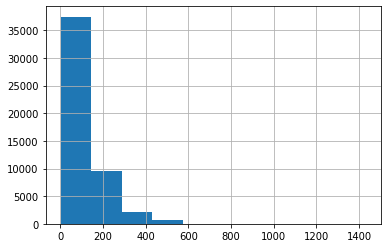

count    50000.000000
mean       119.815700
std         90.041148
min          3.000000
25%         64.000000
50%         89.000000
75%        146.000000
max       1429.000000
dtype: float64

In [25]:
import matplotlib.pyplot as plt

# Histograma das palavras

reviews_len = [len(i) for i in train_x + valid_x + test_x]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [26]:
import numpy as np

# Criando função de padding, para ajustar as reviews
# As reviews com menos de 200 palavras, serão incrementadas com 0 até chegar 200 palavras
# As reviews com mais de 200 palavras, serão cortadas para ficarem com 200 palavras

def padding(reviews, review_len):
    reviews_padding = np.zeros((len(reviews), review_len),dtype=int)
    for i, review in enumerate(reviews):
        if len(review) != 0:
            reviews_padding[i, -len(review):] = np.array(review)[:review_len]
    return reviews_padding

In [27]:
# Normalizando as reviews para terem 200 palavras (inteiros mapeados)

review_len = 200
train_x = padding(train_x, review_len)
valid_x = padding(valid_x, review_len)
test_x = padding(test_x, review_len)

In [28]:
# Verificando shapes das listas

print("Shape de treino :", train_x.shape)
print("Shape de validação :", valid_x.shape)
print("Shape de teste :", test_x.shape)

Shape de treino : (22500, 200)
Shape de validação : (2500, 200)
Shape de teste : (25000, 200)


In [29]:
from torch.utils.data import TensorDataset, DataLoader
import torch

# Criando Tensores e posteriormente dataloaders com as reviews formatadas e os sentimentos

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(df_train.sentiment.to_numpy()))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(df_valid.sentiment.to_numpy()))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(df_test.sentiment.to_numpy()))
batch_size = 50
train_loader = DataLoader(train_data, shuffle = True, batch_size = batch_size)
valid_loader = DataLoader(valid_data, shuffle = True, batch_size = batch_size)
test_loader = DataLoader(test_data, shuffle = True, batch_size = batch_size)

In [30]:
# Verificando se o GPU está habilitado para execução mais rápida 
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('GPU Habilitado.')
else:
    print('GPU Desabilitado')

GPU Habilitado.


In [31]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    Modelo para previsão de sentimentos
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # Criando um layer embeded, para diminuir a dimensionalidade das palavras
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Criando um layer LSTM
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers,
                            dropout=drop_prob, batch_first=True)
        
        # Criando um layer Dropout
        self.dropout = nn.Dropout(0.2)
        
        # Criando um layer Linear
        self.fc = nn.Linear(hidden_dim, output_size)

        # Criando um último layer Sigmoid
        self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        # Executando layer embeded
        embeds = self.embedding(x)

        # Executando layer LSTM
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # Executando layer dropout
        out = self.dropout(lstm_out)

        # Executando layer Linear
        out = self.fc(out)
        
        # Executando layer Sigmoid
        sig_out = self.sig(out)
        
        # Buscando último sigmoid gerado
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        # Criando dois hidden layers com zeros

        weight = next(self.parameters()).data
        
        if(train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                   weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [32]:
# Definindo Hiperparâmetros de treino
vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 400 
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(221640, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [33]:
# Definindo Learning rate
lr=0.003

# Loss e otimizador
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [34]:
epochs = 5
counter = 0

if train_on_gpu:
    net.cuda()

net.train()

# Treinamento
for e in range(epochs):
    h = net.init_hidden(batch_size)

    # Lotes de treino
    for inputs, labels in train_loader:
        counter += 1

        if train_on_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()

        h = tuple([each.data for each in h])

        net.zero_grad()

        output, h = net(inputs, h)

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()

        nn.utils.clip_grad_norm_(net.parameters(), 5)
        optimizer.step()

        if counter % 100 == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                val_h = tuple([each.data for each in val_h])

                if train_on_gpu:
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: ", e+1)
            print("Step: ", counter)
            print("Loss: ", loss.item())
            print("Validation Loss: ", np.mean(val_losses))

Epoch:  1
Step:  100
Loss:  0.5147852897644043
Validation Loss:  0.5934927266836166
Epoch:  1
Step:  200
Loss:  0.4709770977497101
Validation Loss:  0.5046016663312912
Epoch:  1
Step:  300
Loss:  0.44545337557792664
Validation Loss:  0.45444852828979493
Epoch:  1
Step:  400
Loss:  0.5639221668243408
Validation Loss:  0.5001161849498749
Epoch:  2
Step:  500
Loss:  0.17940624058246613
Validation Loss:  0.4094307082891464
Epoch:  2
Step:  600
Loss:  0.23572400212287903
Validation Loss:  0.36507017105817796
Epoch:  2
Step:  700
Loss:  0.2208700180053711
Validation Loss:  0.3909569725394249
Epoch:  2
Step:  800
Loss:  0.08543649315834045
Validation Loss:  0.3642381879687309
Epoch:  2
Step:  900
Loss:  0.1780911535024643
Validation Loss:  0.34917646199464797
Epoch:  3
Step:  1000
Loss:  0.3584897518157959
Validation Loss:  0.38730499178171157
Epoch:  3
Step:  1100
Loss:  0.1785270720720291
Validation Loss:  0.39432923078536986
Epoch:  3
Step:  1200
Loss:  0.09164909273386002
Validation Loss:

In [35]:
# Lista para armazenar losses dos testes

test_losses = []
num_correct = 0

h = net.init_hidden(batch_size)

net.eval()

# Testes
for inputs, labels in test_loader:

    h = tuple([each.data for each in h])

    if train_on_gpu:
        inputs, labels = inputs.cuda(), labels.cuda()
    
    output, h = net(inputs, h)
    
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    pred = torch.round(output.squeeze())
    
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# Printando a Loss
print("Teste Loss: ", np.mean(test_losses))

# Verificando acurácia
test_acc = num_correct/len(test_loader.dataset)
print("Teste Acurácia: ", test_acc)

Teste Loss:  0.6345618462115526
Teste Acurácia:  0.82096


In [36]:
def predict(net, test_review, sequence_length=200):
   
    net.eval()
    
    # Tokenizar a review
    test_review = review_cleaning(test_review)
    test_ints = [[vocab_to_int[word] for word in test_review.split() if word in vocab_to_int.keys()]]
    
    # Padding da review
    seq_length = sequence_length
    features = padding(test_ints, seq_length)
    
    # Criando o tensor
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
      
    h = net.init_hidden(batch_size)
    
    if train_on_gpu:
      feature_tensor = feature_tensor.cuda()
    
    # Executando Rede Neural
    output, h = net(feature_tensor, h)
    
    # Valor predito
    pred = torch.round(output.squeeze())
    
    return pred.item()

In [37]:
# Função para printar resultado
def print_result(result):
  if result == 1:
    print("Review positiva")
  else:
    print("Review negativa")

In [38]:
# Salvando modelo
path = "/content/modelo_sentimento.pt"
torch.save(net.state_dict(), path)

# Definindo Hiperparâmetros
vocab_size = len(vocab_to_int) + 1
output_size = 1
embedding_dim = 400 
hidden_dim = 256
n_layers = 2

# Carregando modelo
model = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.load_state_dict(torch.load(path))
if train_on_gpu:
    model.cuda()

In [39]:
# Exemplo de review negativa
test_review_neg = 'The actors were terrible and the movie direction was awful'
result = predict(model, test_review_neg)
print_result(result)

Review negativa


In [40]:
# Exemplo de review positiva
test_review_pos = 'Great movie, I didnt see a movie like that in years'
result = predict(model, test_review_pos)
print_result(result)

Review positiva


In [41]:
# Aplicando modelo em um dataset de tweets
df_tweets = pd.read_csv("https://raw.githubusercontent.com/lucamaral/imdb_sentiment/main/Tweets.csv")
df_tweets = df_tweets[['airline_sentiment', 'text']]
df_tweets = df_tweets[df_tweets.airline_sentiment != 'neutral']
df_tweets.airline_sentiment.value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [60]:
# Executando modelo na base de tweets

predicted = []
for tweet in df_tweets.text:
  result = predict(model, tweet)
  predicted.append(result)

actual = []
for airline_sentiment in df_tweets.airline_sentiment:
  actual.append(1 if airline_sentiment == 'positive' else 0)

In [61]:
# Verificando a acurácia do modelo na base de tweets

from sklearn.metrics import accuracy_score

accuracy_score(actual, predicted)

0.5977818213326401